<a href="https://colab.research.google.com/github/noahsark-cloud/noahsark-cloud/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


In [4]:
# Load the traffic accident data
file_path = '/content/large_traffic_accident_data_with_location.csv'  # Replace with your file path
accident_data = pd.read_csv(file_path)


In [5]:
# Convert 'Date' and 'Time' columns to datetime format
accident_data['Date'] = pd.to_datetime(accident_data['Date'])
accident_data['Hour'] = pd.to_datetime(accident_data['Time'], format='%H:%M').dt.hour


<ipython-input-6-9e5816755aa4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Road_Condition', data=accident_data, palette='Set2')


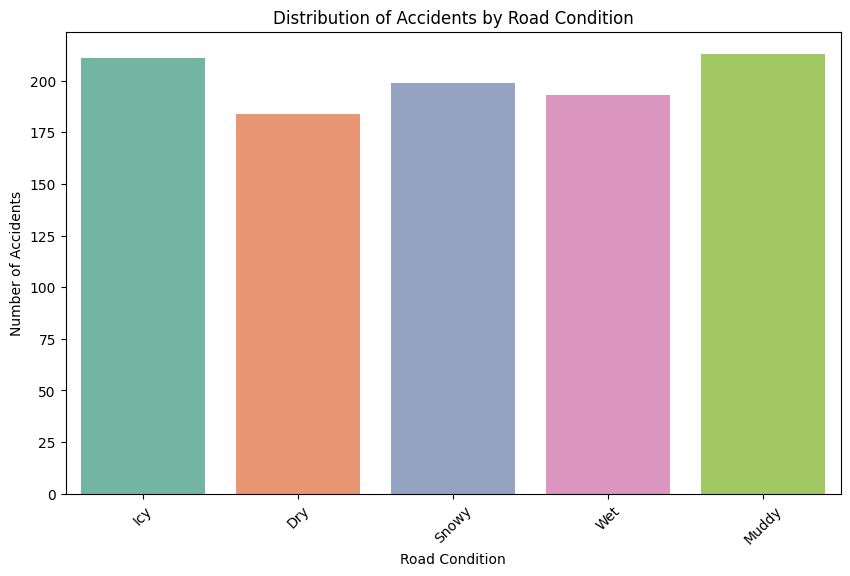

In [6]:
# Distribution of accidents by road condition
plt.figure(figsize=(10, 6))
sns.countplot(x='Road_Condition', data=accident_data, palette='Set2')
plt.title('Distribution of Accidents by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


<ipython-input-7-d6522baa3089>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather_Condition', data=accident_data, palette='Set1')


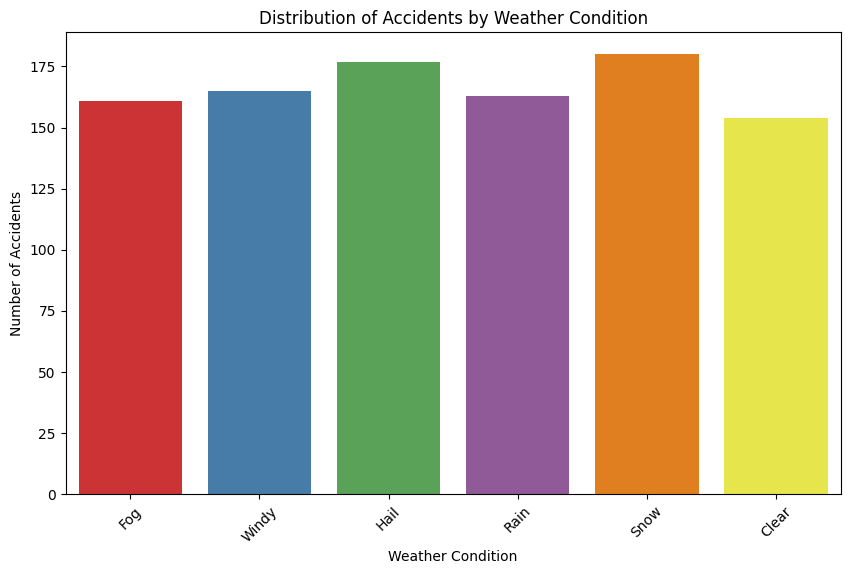

In [7]:
# Distribution of accidents by weather condition
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_Condition', data=accident_data, palette='Set1')
plt.title('Distribution of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


<ipython-input-8-a8f2024b5c8c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=accident_data, palette='coolwarm')


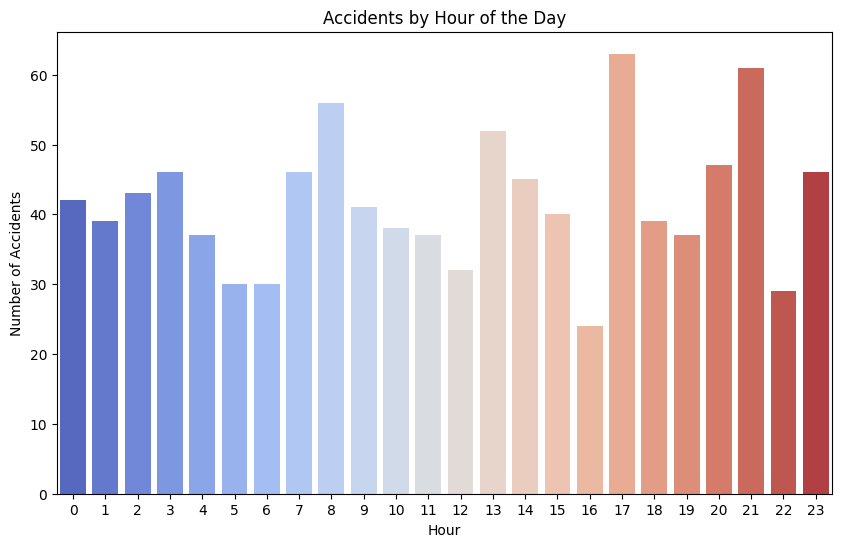

In [8]:
# Distribution of accidents by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=accident_data, palette='coolwarm')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()


In [9]:
# Visualize accident hotspots on a map using Folium
# Ensure Latitude and Longitude columns exist in the dataset
accident_data = accident_data.dropna(subset=['Latitude', 'Longitude'])  # Remove rows with missing location data

# Create a map centered around the average location
accident_map = folium.Map(location=[accident_data['Latitude'].mean(), accident_data['Longitude'].mean()], zoom_start=5)

# Create a heatmap of accident hotspots
heat_data = [[row['Latitude'], row['Longitude']] for index, row in accident_data.iterrows()]
HeatMap(heat_data).add_to(accident_map)

# Save the map to an HTML file and display it
accident_map.save('accident_hotspots_map.html')

print("Accident hotspots map saved as 'accident_hotspots_map.html'.")


Accident hotspots map saved as 'accident_hotspots_map.html'.


<ipython-input-10-b18c2359fbeb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Road_Condition', y='Severity', data=accident_data, palette='Set3')


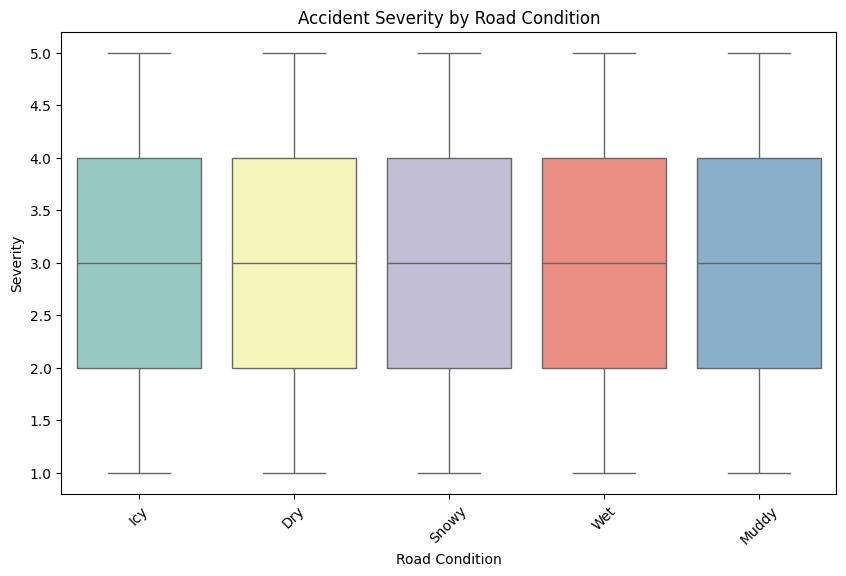

In [10]:
# Analyze contributing factors (road condition and weather) to accident severity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Road_Condition', y='Severity', data=accident_data, palette='Set3')
plt.title('Accident Severity by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Severity')
plt.xticks(rotation=45)
plt.show()


<ipython-input-11-581c4db397a8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weather_Condition', y='Severity', data=accident_data, palette='Set2')


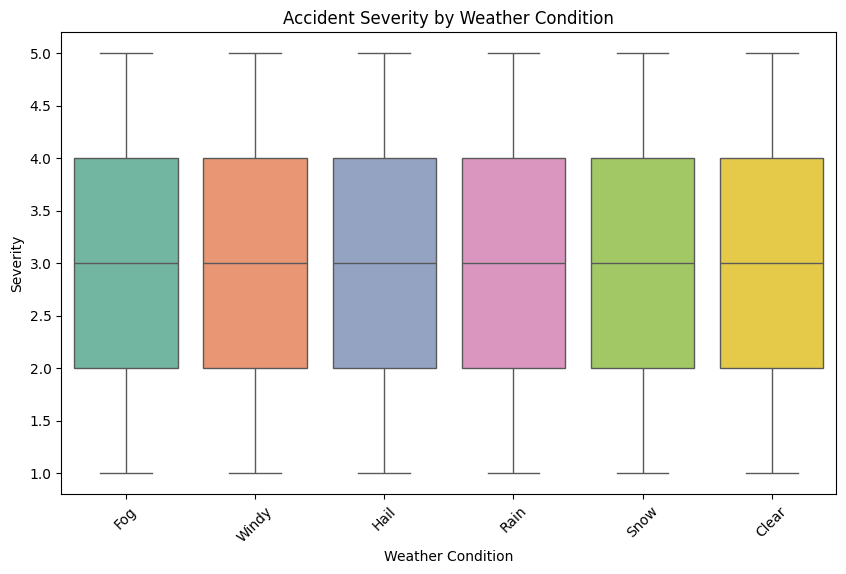

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather_Condition', y='Severity', data=accident_data, palette='Set2')
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Severity')
plt.xticks(rotation=45)
plt.show()
